# Imports

In [1]:
%reload_ext nb_black
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
from scipy import stats

plt.style.use(["dark_background"])
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

<IPython.core.display.Javascript object>

In [3]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "heartdisease"
conn_str = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"
query = """
SELECT *
FROM heartdisease
"""
heartdisease_df = pd.read_sql_query(query, con=conn_str)
# df.head()

<IPython.core.display.Javascript object>

In [4]:
# data preprocessing
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace="?", value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

<IPython.core.display.Javascript object>

In [5]:
# standardize the data
scaled_X = StandardScaler().fit_transform(X)

<IPython.core.display.Javascript object>

> 1. Apply DBSCAN to the heart disease dataset by trying different values for the eps and min_samples parameters. You'll realize that it's really hard—if not impossible—to get a two-cluster solution using DBSCAN.

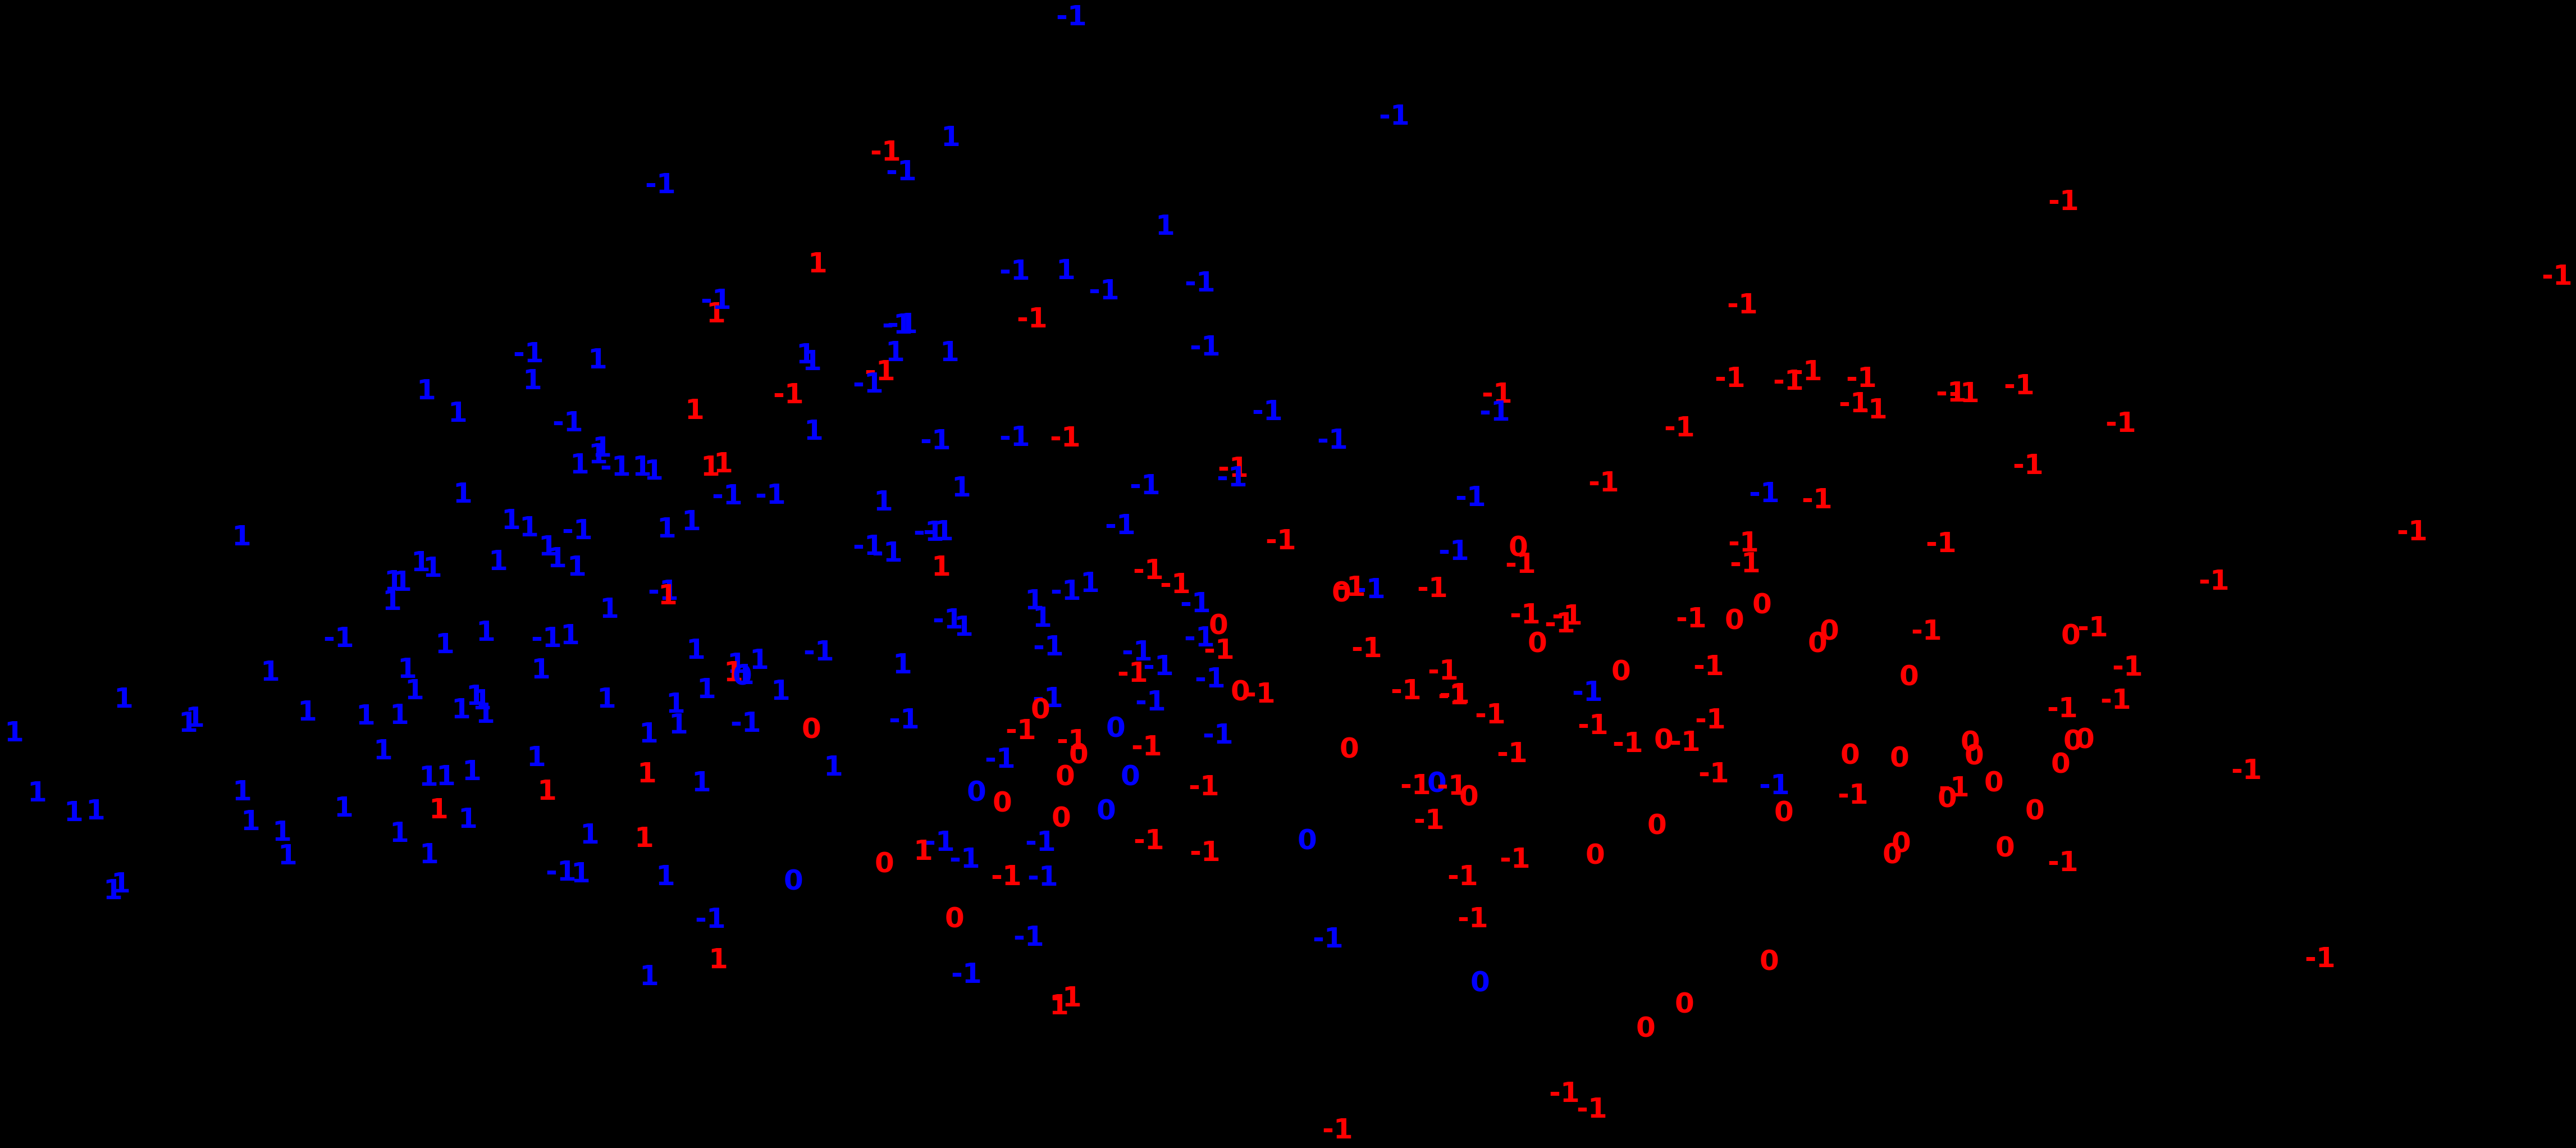

<IPython.core.display.Javascript object>

In [58]:
# clustering model object
dbscan_cluster = DBSCAN(eps=2.5, min_samples=8, metric="euclidean")

# fit cluster model
clusters = dbscan_cluster.fit_predict(scaled_X)

# pca object for cluster visualization
pca = PCA(n_components=2).fit_transform(scaled_X)

plt.figure(figsize=(10, 5))
colours = "rbg"
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

> 2. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then increase the value of min_samples. When you increase the value of min_samples, how does that affect the number of clusters that DBSCAN identifies?

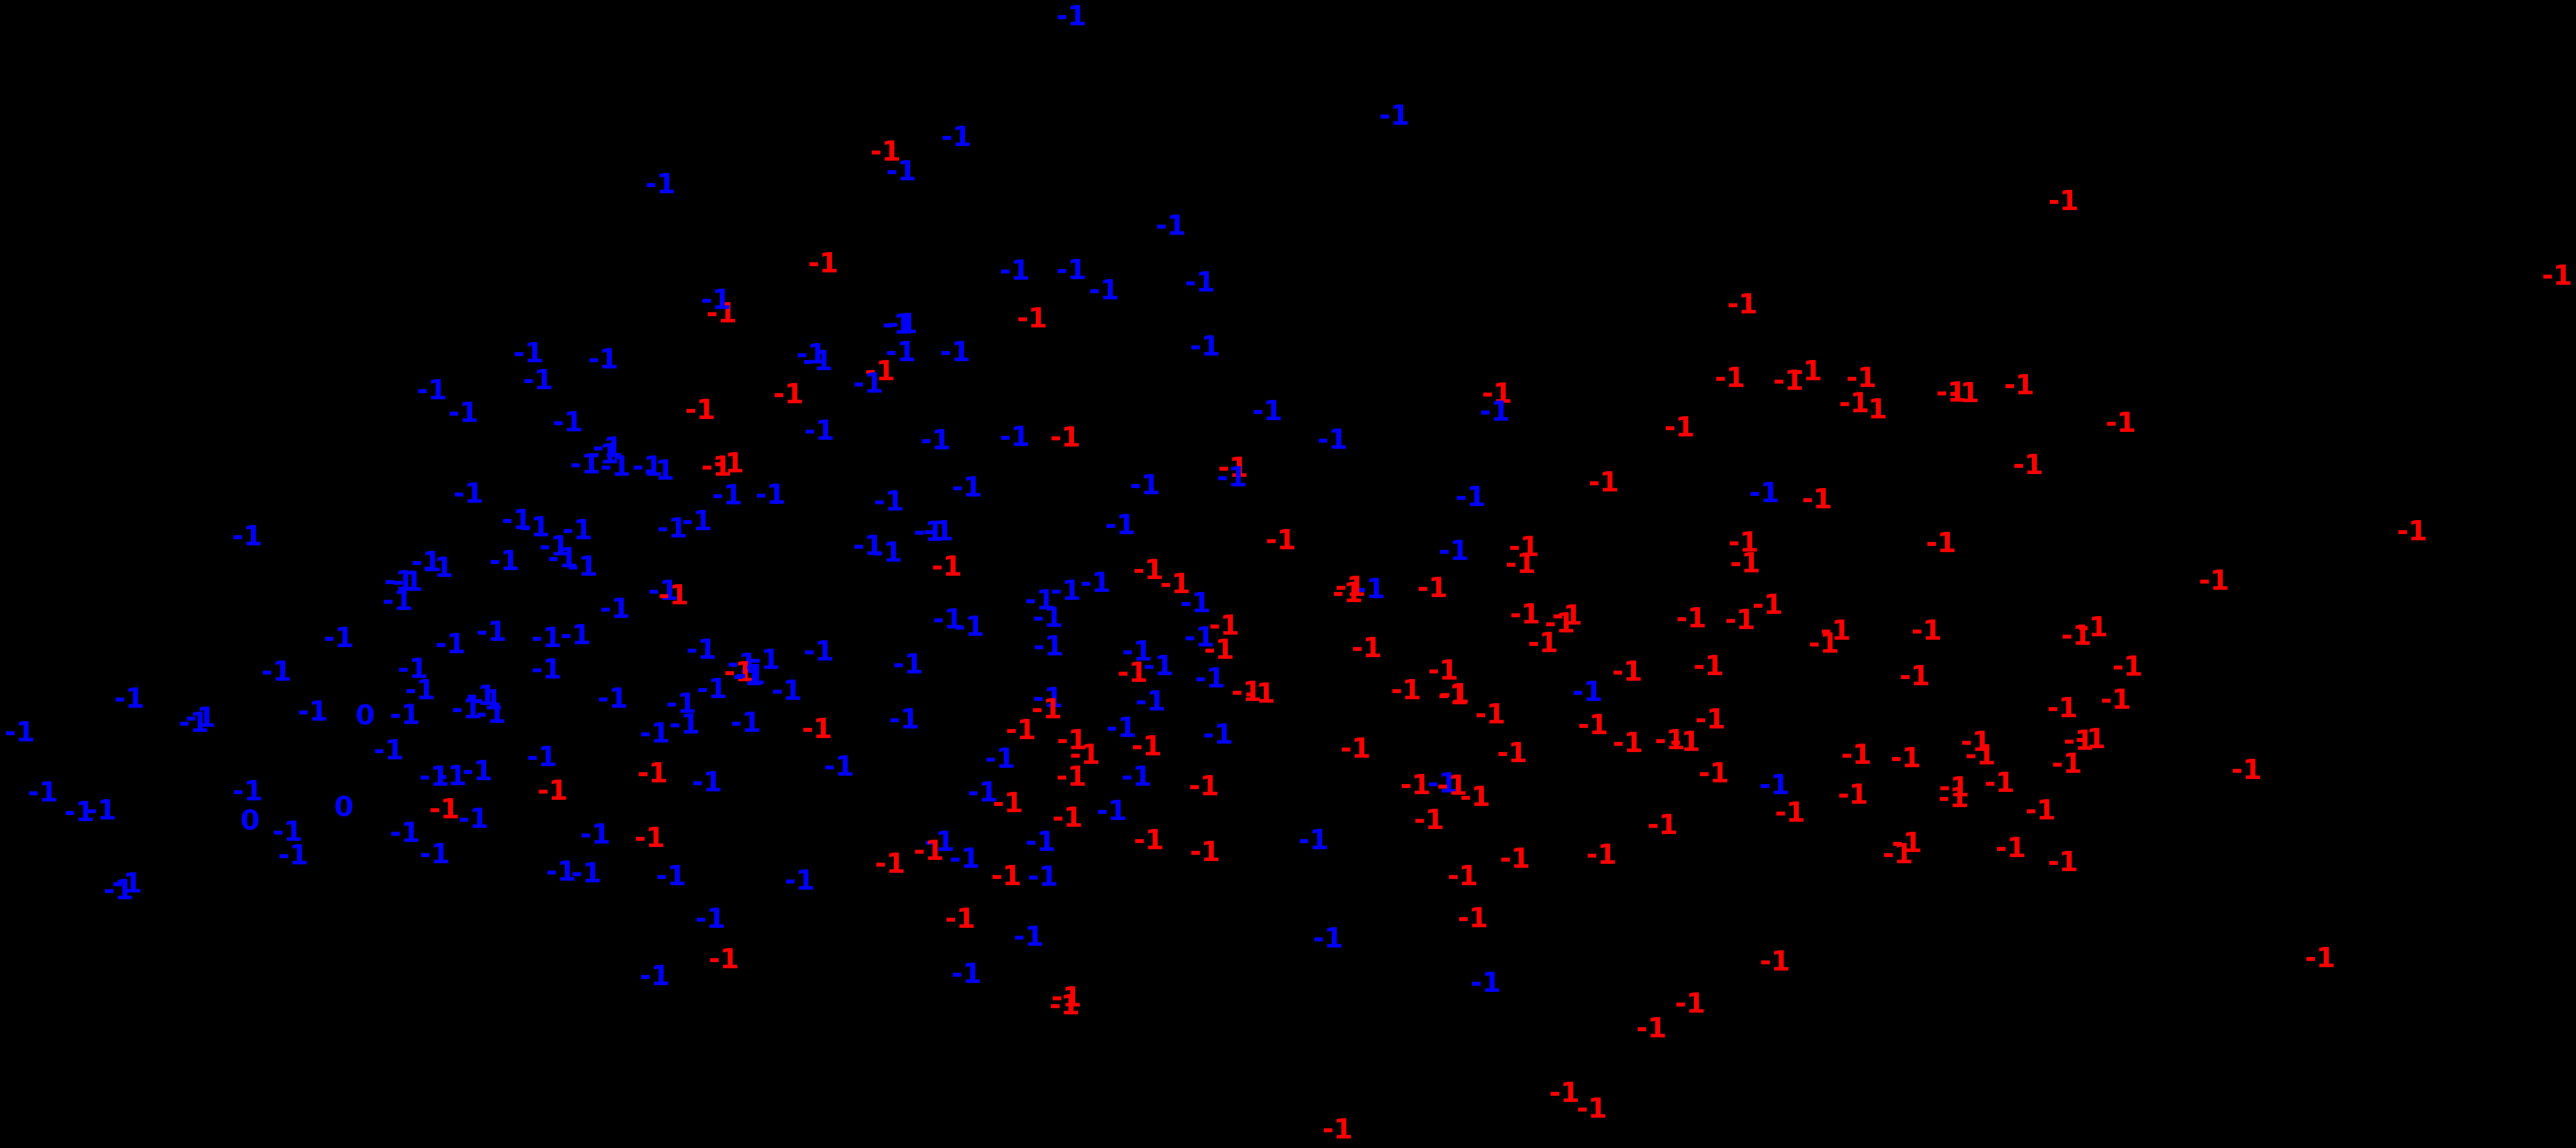

<IPython.core.display.Javascript object>

In [61]:
# clustering model object
dbscan_cluster = DBSCAN(eps=1, min_samples=3, metric="euclidean")

# fit cluster model
clusters = dbscan_cluster.fit_predict(scaled_X)

# pca object for cluster visualization
pca = PCA(n_components=2).fit_transform(scaled_X)

plt.figure(figsize=(10, 5))
colours = "rbg"
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

> min_sample increase decreases the number of clusters

> 3. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then increase the value of eps. When you increase the value of eps, how does that affect the number of clusters that DBSCAN identifies?

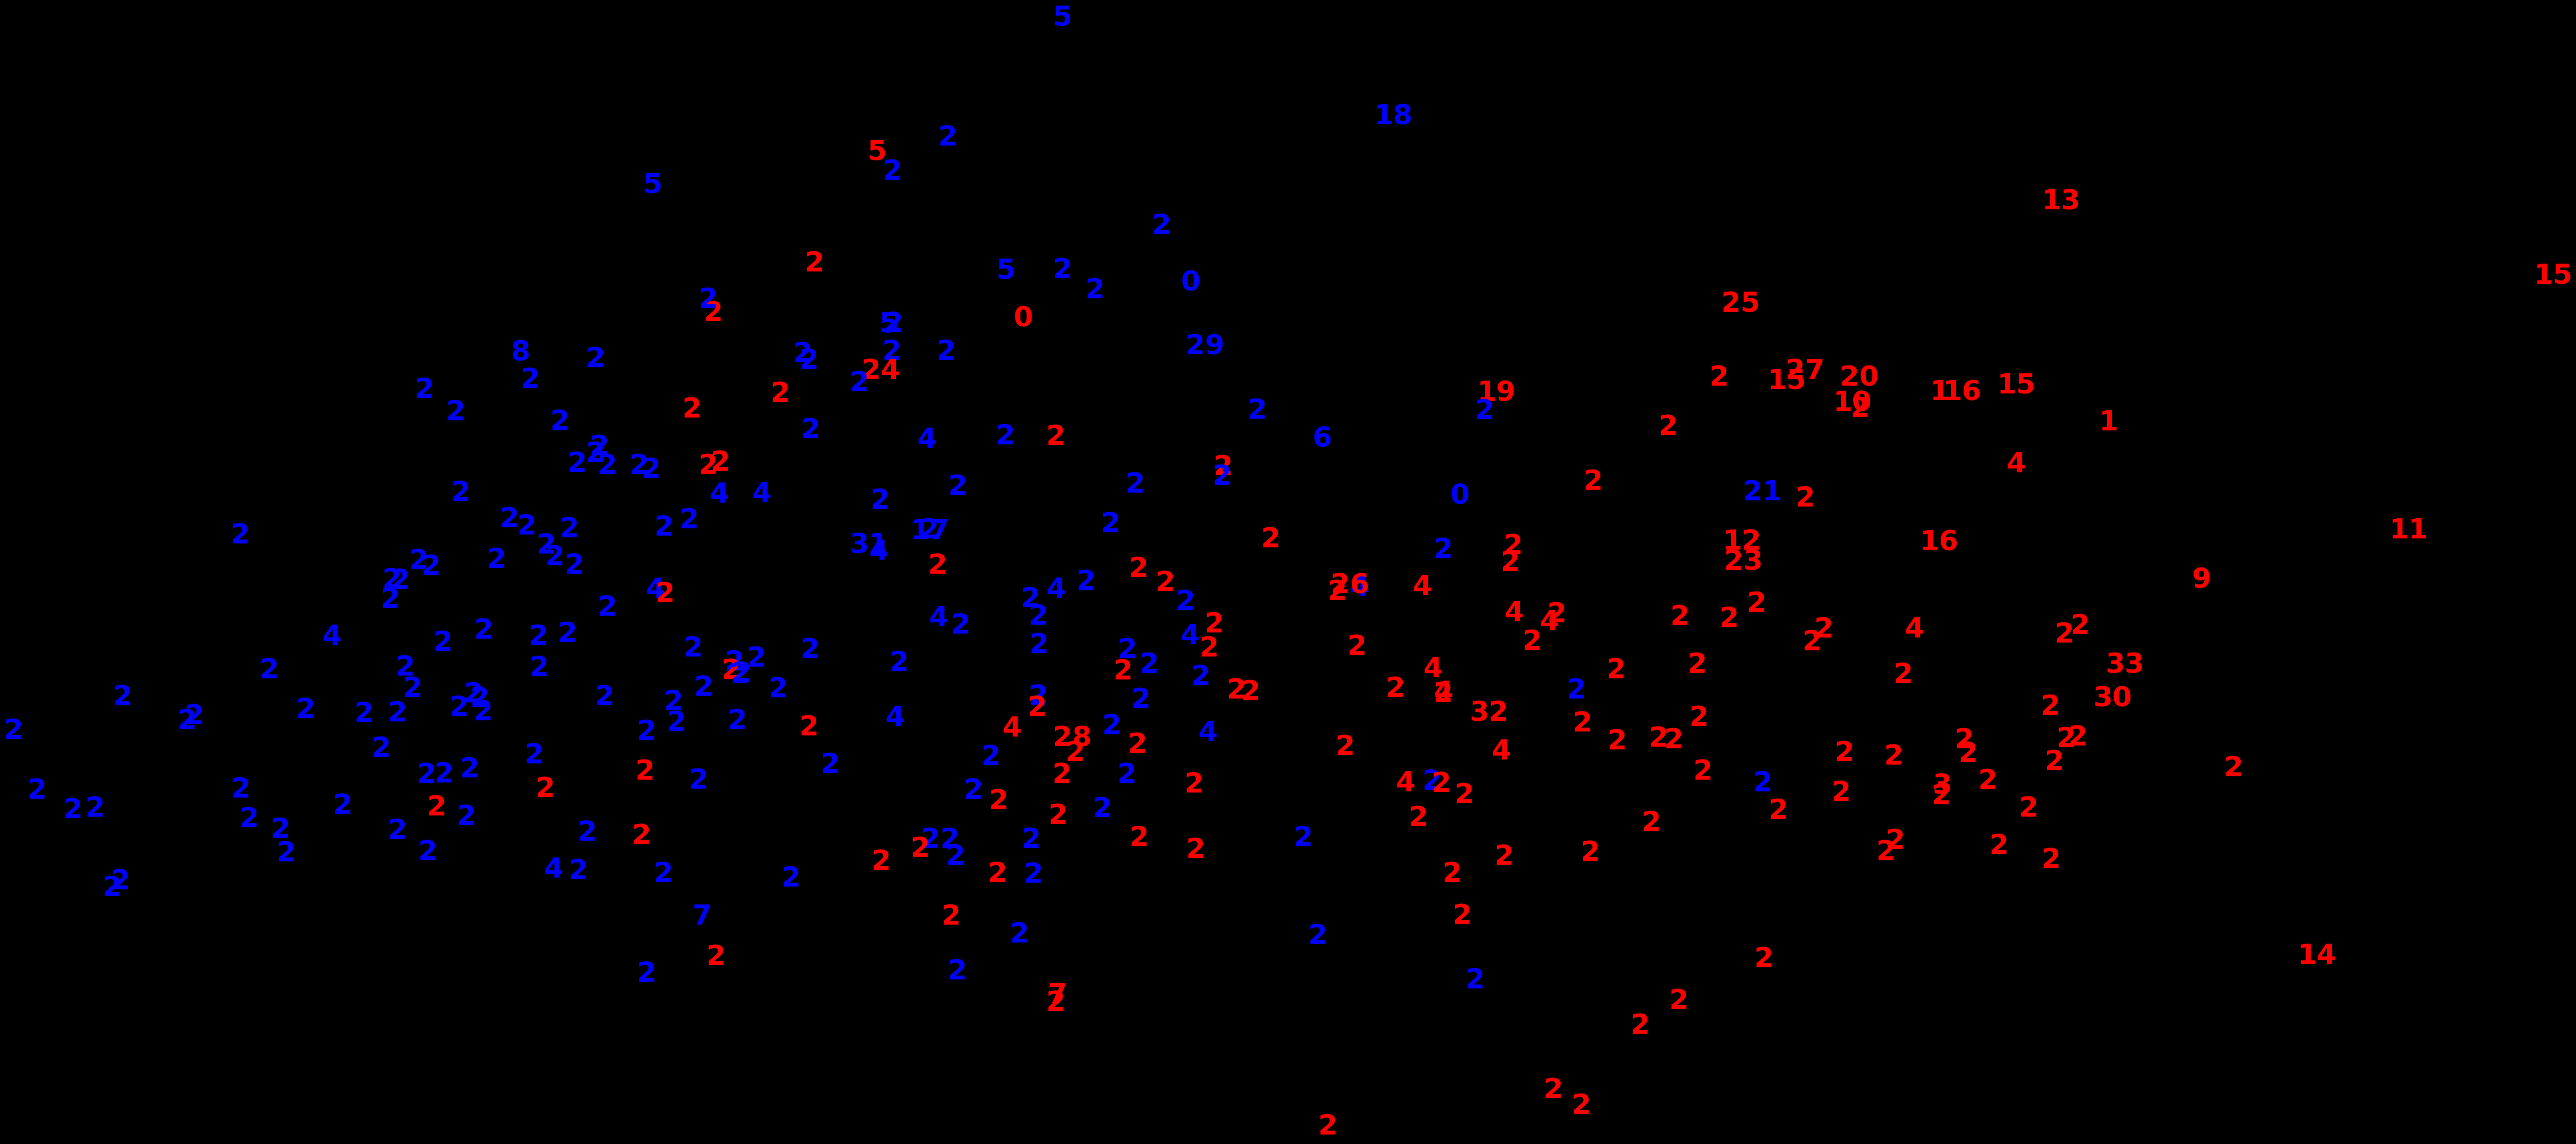

<IPython.core.display.Javascript object>

In [66]:
# clustering model object
dbscan_cluster = DBSCAN(eps=3, min_samples=1, metric="euclidean")

# fit cluster model
clusters = dbscan_cluster.fit_predict(scaled_X)

# pca object for cluster visualization
pca = PCA(n_components=2).fit_transform(scaled_X)

plt.figure(figsize=(10, 5))
colours = "rbg"
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

> increasing eps decreases the number of clusters by increasing the size of the cluster area